In [2]:
import pandas as pd
import numpy as np
import glob
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import zipfile
import os

# Define the paths
zip_file_path = r"C:\Users\hp\Downloads\gas+sensor+array+drift+dataset+at+different+concentrations.zip"
extraction_path = r'C:\path\to\your\extraction_folder'

# Ensure the extraction folder exists
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Files extracted to {extraction_path}")


Files extracted to C:\path\to\your\extraction_folder


In [4]:
import glob
import pandas as pd
import os

# Define the extraction folder path
extraction_path = r'C:\path\to\your\extraction_folder'

# Get all .dat files in the extraction folder
data_files = glob.glob(os.path.join(extraction_path, '*.dat'))

# Initialize an empty list to store DataFrames
df_list = []

# Read each .dat file and append to the list
for file in data_files:
    df_temp = pd.read_csv(file, delimiter=' ', header=None)
    df_list.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

print("Data has been loaded and concatenated into a single DataFrame.")


Data has been loaded and concatenated into a single DataFrame.


In [5]:
df['gas_type'] = df[0].str.split(';').str[0].astype(int)
df['concentration'] = df[0].str.split(';').str[1].astype(float)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,gas_type,concentration
0,1;10.000000,1:15596.162100,2:1.868245,3:2.371604,4:2.803678,5:7.512213,6:-2.739388,7:-3.344671,8:-4.847512,9:15326.691400,...,122:3.972203,123:0.527291,124:0.728443,125:1.445783,126:-0.545079,127:-0.902241,128:-2.654529,NaN,1,10.0
1,1;20.000000,1:26402.070400,2:2.532401,3:5.411209,4:6.509906,5:7.658469,6:-4.722217,7:-5.817651,8:-7.518333,9:23855.781200,...,122:4.281373,123:0.980205,124:1.628050,125:1.951172,126:-0.889333,127:-1.323505,128:-1.749225,NaN,1,20.0
2,1;30.000000,1:42103.582000,2:3.454189,3:8.198175,4:10.508439,5:11.611003,6:-7.668313,7:-9.478675,8:-12.230939,9:37562.300800,...,122:5.396827,123:1.403973,124:2.476956,125:3.039841,126:-1.334558,127:-1.993659,128:-2.348370,NaN,1,30.0
3,1;40.000000,1:42825.988300,2:3.451192,3:12.113940,4:16.266853,5:39.910056,6:-7.849409,7:-9.689894,8:-11.921704,9:38379.066400,...,122:5.501071,123:1.981933,124:3.569823,125:4.049197,126:-1.432205,127:-2.146158,128:-2.488957,NaN,1,40.0
4,1;50.000000,1:58151.175700,2:4.194839,3:11.455096,4:15.715298,5:17.654915,6:-11.083364,7:-13.580692,8:-16.407848,9:51975.589900,...,122:7.174334,123:1.993808,124:3.829303,125:4.402448,126:-1.930107,127:-2.931265,128:-4.088756,NaN,1,50.0


In [6]:
features = df.iloc[:, 1:].stack().str.split(':').apply(pd.Series).reset_index(level=1, drop=True)
features.columns = ['feature_id', 'feature_value']
features['feature_value'] = pd.to_numeric(features['feature_value'])  # Convert to numeric
features = features.pivot_table(index=features.index, columns='feature_id', values='feature_value', aggfunc='mean').astype(float)

# To see the output, run the code. To view the first 5 rows use:
features.head()

feature_id,1,10,100,101,102,103,104,105,106,107,...,90,91,92,93,94,95,96,97,98,99
0,15596.1621,1.768526,0.246473,1.358106,-0.187465,-0.416382,-1.058061,1059.7562,1.896047,0.198946,...,2.949381,0.342575,0.515090,1.340477,-0.361030,-0.493482,-1.200617,862.7479,1.779291,0.165138
1,26402.0704,2.164706,0.558008,0.948564,-0.289557,-0.501078,-1.191404,1459.6356,2.149242,0.361007,...,3.399659,0.649639,0.948781,1.369550,-0.598444,-0.820868,-1.081919,1237.0131,2.067927,0.305793
2,42103.5820,2.840403,0.841068,1.808291,-0.426742,-0.711579,-1.129027,2040.1528,2.572696,0.509803,...,4.286887,0.917809,1.390353,1.810937,-0.909467,-1.254904,-1.732933,1735.0383,2.466508,0.450574
3,42825.9883,2.851173,1.226975,1.828968,-0.463871,-0.785627,-1.249903,2144.8436,2.660842,0.714324,...,4.382205,1.298156,2.334433,2.427754,-0.964750,-1.315083,-1.575122,1837.0551,2.560248,0.626115
4,58151.1757,3.480866,1.322201,1.666461,-0.611909,-1.018826,-1.770461,2784.4952,3.196657,0.716810,...,5.642596,1.293397,2.071232,2.683706,-1.316635,-1.798607,-3.026084,2388.1891,3.067174,0.632552


In [7]:
df = df[['gas_type', 'concentration']].merge(features, left_index=True, right_index=True)

# To see the output, run the code. To view the first 5 rows use:
df.head()


,gas_type,concentration,1,10,100,101,102,103,104,105,...,90,91,92,93,94,95,96,97,98,99
0,1,10.0,15596.1621,1.768526,0.246473,1.358106,-0.187465,-0.416382,-1.058061,1059.7562,...,2.949381,0.342575,0.515090,1.340477,-0.361030,-0.493482,-1.200617,862.7479,1.779291,0.165138
1,1,20.0,26402.0704,2.164706,0.558008,0.948564,-0.289557,-0.501078,-1.191404,1459.6356,...,3.399659,0.649639,0.948781,1.369550,-0.598444,-0.820868,-1.081919,1237.0131,2.067927,0.305793
2,1,30.0,42103.5820,2.840403,0.841068,1.808291,-0.426742,-0.711579,-1.129027,2040.1528,...,4.286887,0.917809,1.390353,1.810937,-0.909467,-1.254904,-1.732933,1735.0383,2.466508,0.450574
3,1,40.0,42825.9883,2.851173,1.226975,1.828968,-0.463871,-0.785627,-1.249903,2144.8436,...,4.382205,1.298156,2.334433,2.427754,-0.964750,-1.315083,-1.575122,1837.0551,2.560248,0.626115
4,1,50.0,58151.1757,3.480866,1.322201,1.666461,-0.611909,-1.018826,-1.770461,2784.4952,...,5.642596,1.293397,2.071232,2.683706,-1.316635,-1.798607,-3.026084,2388.1891,3.067174,0.632552


In [8]:
# Display basic information about the dataset
df.info()

# Summary statistics of numerical features
df.describe()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Columns: 130 entries, gas_type to 99
dtypes: float64(129), int32(1)
memory usage: 13.7 MB



Missing Values:
gas_type         0
concentration    0
1                0
10               0
100              0
                ..
95               0
96               0
97               0
98               0
99               0
Length: 130, dtype: int64


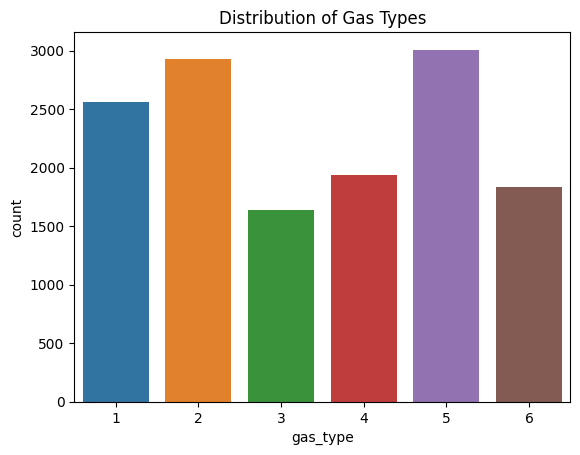

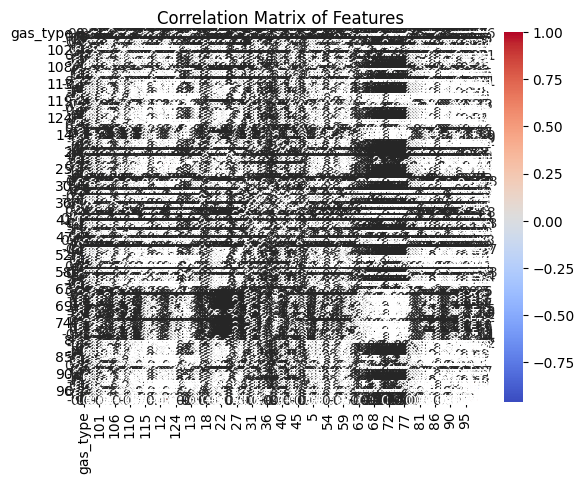

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of gas types
sns.countplot(x='gas_type', data=df)
plt.title('Distribution of Gas Types')
plt.show()

# Correlation matrix of features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


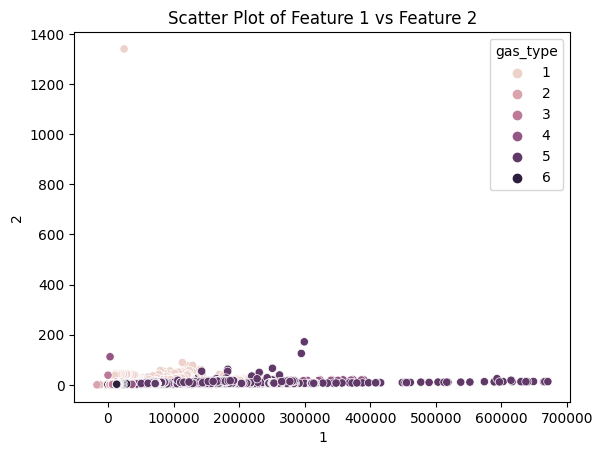

In [10]:
# Scatter plot of two features
sns.scatterplot(x='1', y='2', hue='gas_type', data=df)  # Replace '1' and '2' with actual feature names if desired
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical features
categorical_features = ['gas_type']
numerical_features = df.columns[2:].tolist()  # Assuming gas_type and concentration are the first two columns

# Create preprocessing pipelines
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Use sparse=False for compatibility with some models
])
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply preprocessing to the data
X = df[numerical_features + categorical_features]  # Features
y = df['concentration']  # Assuming concentration is the target variable, change if needed

X_preprocessed = preprocessor.fit_transform(X)

In [12]:
print(X_preprocessed.shape)

(13910, 134)


In [13]:
print(X_preprocessed[:5, :10])  # Print the first 5 rows and 10 columns

[[-0.49882258 -0.31308557 -1.47302968 -1.24678964  1.31799306  1.21054242
   0.75884562 -1.3992722  -0.89636017 -1.62007537]
 [-0.34410385 -0.28766533 -1.37038095 -1.33029967  1.17264461  1.14300238
   0.73056043 -1.25447598 -0.74735197 -1.45464961]
 [-0.11928999 -0.24431034 -1.27711455 -1.15499207  0.97733422  0.9751403
   0.74379206 -1.04427087 -0.49814435 -1.30276426]
 [-0.10894659 -0.2436193  -1.14996073 -1.15077581  0.92447364  0.91609141
   0.71815141 -1.00636236 -0.44626941 -1.09399693]
 [ 0.11047907 -0.20321609 -1.11858439 -1.18391274  0.71371183  0.73012903
   0.60772879 -0.7747447  -0.13093604 -1.09145931]]


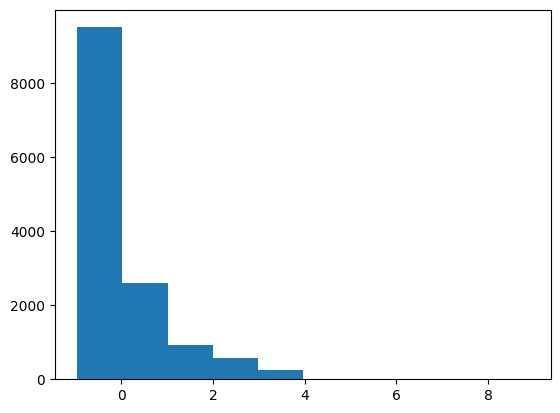

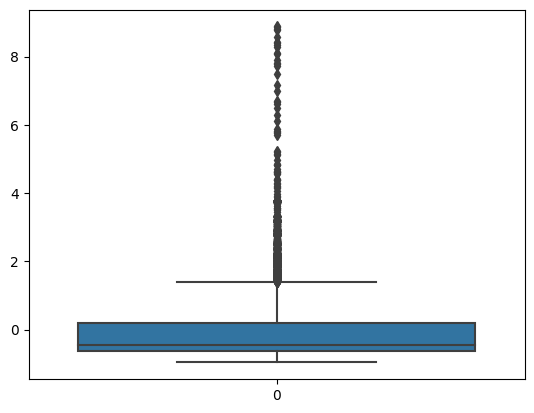

In [14]:
import matplotlib.pyplot as plt
plt.hist(X_preprocessed[:, 0])  # Histogram of the first feature
plt.show()

import seaborn as sns
sns.boxplot(X_preprocessed[:, 0])  # Box plot of the first feature
plt.show()

In [15]:
import pandas as pd
columns_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)) #Get column names
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=columns_names)
X_preprocessed_df.head()

,1,10,100,101,102,103,104,105,106,107,...,96,97,98,99,gas_type_1,gas_type_2,gas_type_3,gas_type_4,gas_type_5,gas_type_6
0,-0.498823,-0.313086,-1.473030,-1.246790,1.317993,1.210542,0.758846,-1.399272,-0.896360,-1.620075,...,0.808844,-1.456617,-0.979362,-1.631718,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.344104,-0.287665,-1.370381,-1.330300,1.172645,1.143002,0.730560,-1.254476,-0.747352,-1.454650,...,0.818692,-1.319184,-0.802124,-1.492716,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.119290,-0.244310,-1.277115,-1.154992,0.977334,0.975140,0.743792,-1.044271,-0.498144,-1.302764,...,0.764680,-1.136306,-0.557373,-1.349637,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.108947,-0.243619,-1.149961,-1.150776,0.924474,0.916091,0.718151,-1.006362,-0.446269,-1.093997,...,0.777773,-1.098844,-0.499812,-1.176158,1.0,0.0,0.0,0.0,0.0,0.0
4,0.110479,-0.203216,-1.118584,-1.183913,0.713712,0.730129,0.607729,-0.774745,-0.130936,-1.091459,...,0.657393,-0.896464,-0.188532,-1.169797,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Using Regressors since the target is concentration
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters if needed
rf_model.fit(X_train, y_train)

# Train Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters if needed
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)
gbm_preds = gbm_model.predict(X_test)

# Evaluate the models
print("Random Forest:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_preds))
print("R-squared:", r2_score(y_test, rf_preds))

print("\nGradient Boosting:")
print("Mean Squared Error:", mean_squared_error(y_test, gbm_preds))
print("R-squared:", r2_score(y_test, gbm_preds))

Random Forest:
Mean Squared Error: 900.1188965402587
R-squared: 0.9695083127594525

Gradient Boosting:
Mean Squared Error: 1245.1422006458224
R-squared: 0.957820587149065


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


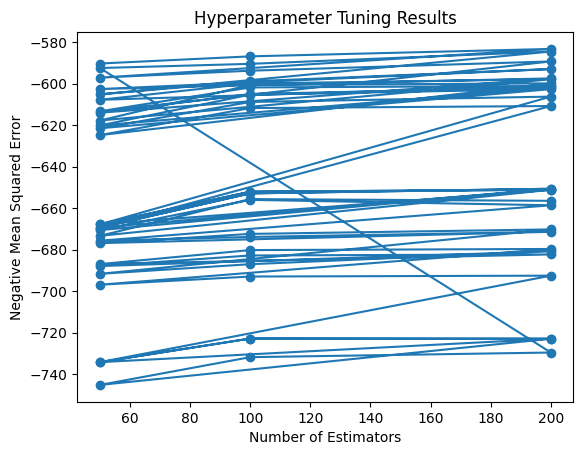

In [17]:
# Assuming necessary imports and data preprocessing steps have been done
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Using Regressors since the target is concentration
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Assuming X_preprocessed and y are already defined from the previous steps
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and fit a RandomForestRegressor (baseline model) for hyperparameter optimization
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train) #Fitting the data this was missing in your code

            
# Get the best hyperparameters and train the best model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)


#Visualization

# Plot the results of the grid search
results = grid_search.cv_results_
plt.plot(results['param_n_estimators'].data, results['mean_test_score'], marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Negative Mean Squared Error')
plt.title('Hyperparameter Tuning Results')
plt.show()

Feature ranking:
1. feature 106 (0.324278)
2. feature 98 (0.215487)
3. feature 33 (0.083253)
4. feature 110 (0.060836)
5. feature 41 (0.049001)
6. feature 111 (0.032107)
7. feature 69 (0.030179)
8. feature gas_type_3 (0.023605)
9. feature 28 (0.016812)
10. feature 39 (0.013466)
11. feature gas_type_2 (0.009009)
12. feature 35 (0.007012)
13. feature 72 (0.005853)
14. feature 120 (0.005773)
15. feature 126 (0.004676)
16. feature 127 (0.004266)
17. feature 105 (0.004005)
18. feature 108 (0.003762)
19. feature gas_type_4 (0.003455)
20. feature 42 (0.003404)
21. feature 44 (0.003329)
22. feature 107 (0.002885)
23. feature gas_type_1 (0.002704)
24. feature 118 (0.002609)
25. feature 74 (0.002454)
26. feature 25 (0.002440)
27. feature 32 (0.002147)
28. feature 112 (0.002139)
29. feature 15 (0.002111)
30. feature 119 (0.002008)
31. feature 128 (0.001925)
32. feature 77 (0.001868)
33. feature 31 (0.001860)
34. feature gas_type_5 (0.001833)
35. feature 38 (0.001785)
36. feature 87 (0.001775)
37.

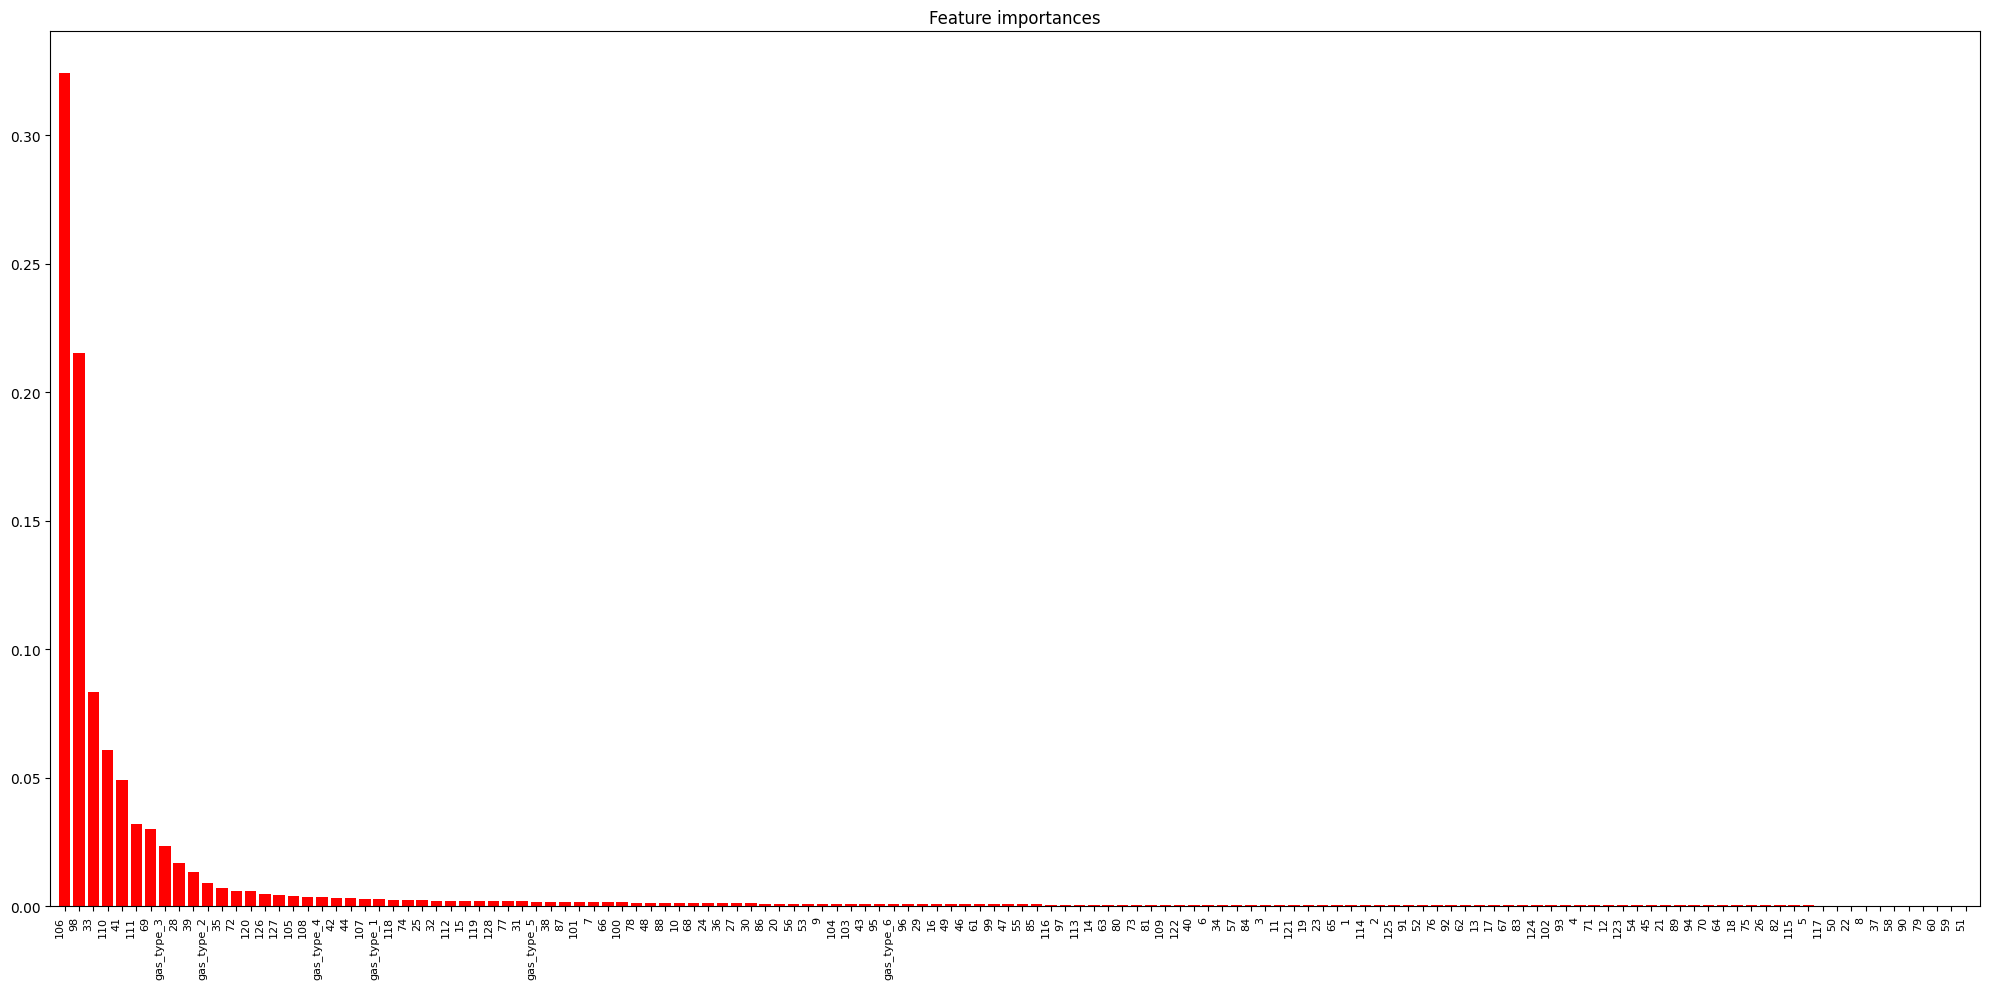

In [18]:
importances = best_rf_model.feature_importances_
feature_names = X_preprocessed_df.columns # Assuming X_preprocessed_df is your DataFrame with feature names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances

plt.figure(figsize=(20, 10))  # Increase figure size significantly
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")

# Adjust label spacing using plt.subplots_adjust()
plt.subplots_adjust(bottom=0.3)  # Increase bottom margin

plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90, ha='right', fontsize=8)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

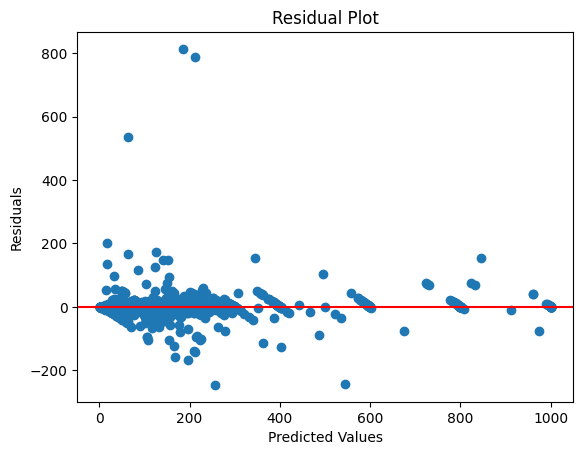

In [32]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at 0
plt.show()

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 234}
Mean Squared Error: 901.0718307748197
R-squared: 0.9694760319432706


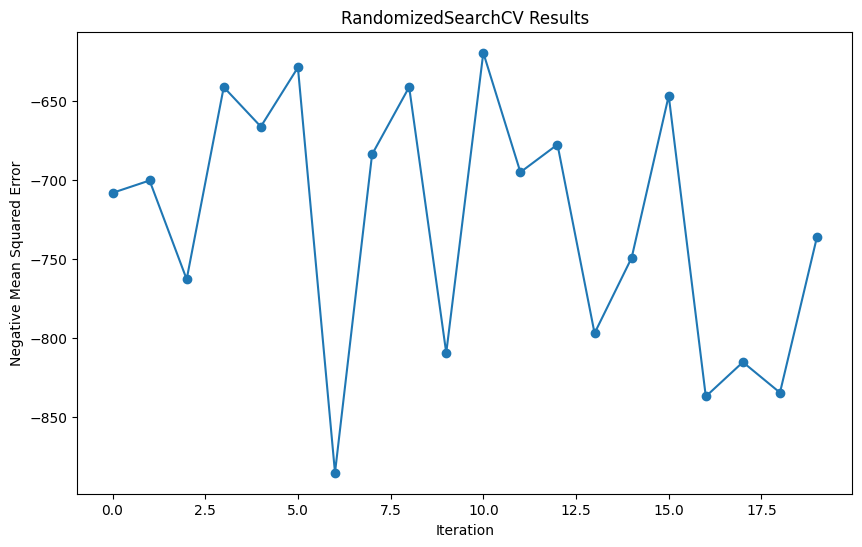

In [19]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import randint

# Assuming X_preprocessed and y are already defined from previous steps

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor (baseline model) for hyperparameter optimization
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

# Create and fit a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=20, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and train the best model
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get the results of the RandomizedSearchCV
results = random_search.cv_results_

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results['mean_test_score'], marker='o')
plt.xlabel('Iteration')
plt.ylabel('Negative Mean Squared Error')
plt.title('RandomizedSearchCV Results')
plt.show()

In [20]:
# Assuming best_rf_model is trained with the best hyperparameters
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 901.0718307748197
R-squared: 0.9694760319432706


    feature  importance
8       106    0.323357
126      98    0.216799
55       33    0.084181
13      110    0.059303
64       41    0.048793
..      ...         ...
118      90    0.000240
85       60    0.000204
105      79    0.000168
83       59    0.000162
75       51    0.000113

[134 rows x 2 columns]


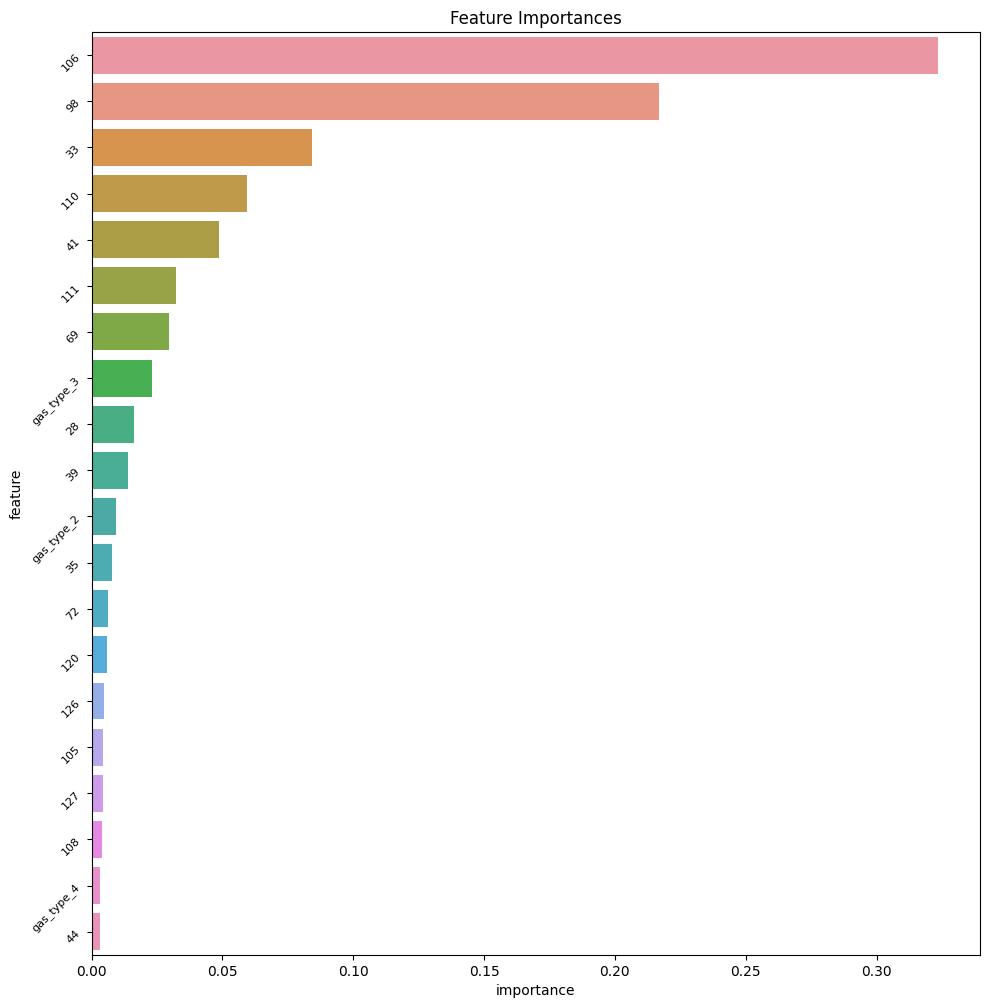

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

importances = best_rf_model.feature_importances_
feature_names = X_preprocessed_df.columns  # Assuming X_preprocessed_df is your DataFrame

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print or visualize the feature importances
print(feature_importances)

# Assuming 'importances' and 'feature_names' are already defined

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Reduce the number of features displayed (optional)
N = 20  # Display top 20 features
feature_importances = feature_importances.head(N)


# Create the plot with adjustments
plt.figure(figsize=(10, 12))  # Adjust figure size
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.yticks(rotation=45, ha='right')  # Rotate y-axis labels and align to the right
plt.tick_params(axis='y', labelsize=8)  # Adjust font size
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin to provide more space

plt.show()

In [22]:
from sklearn.model_selection import train_test_split
# ... (your other imports) ...

# Split the data into training + validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42) 

# Further split training + validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# ... (rest of your code for training and evaluation) ...

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'best_rf_model', 'X_val', and 'y_val' are defined

# Make predictions on the validation set
y_pred_val = best_rf_model.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

# Print the validation results
print("Validation Mean Squared Error:", mse_val)
print("Validation R-squared:", r2_val)

Validation Mean Squared Error: 78.12384817842323
Validation R-squared: 0.9972278952190675


In [24]:
import joblib
joblib.dump(best_rf_model, 'trained_model.pkl')  # Save the model as 'trained_model.pkl'

['trained_model.pkl']

Mean Squared Error: 901.0718307748197
R-squared: 0.9694760319432706


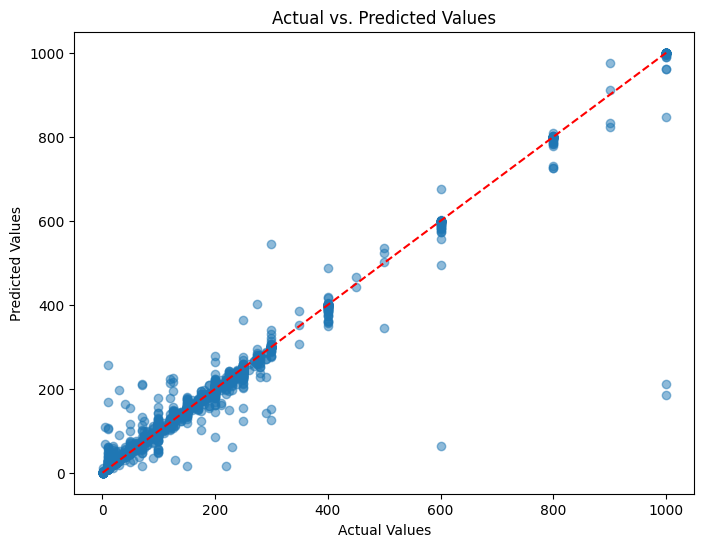

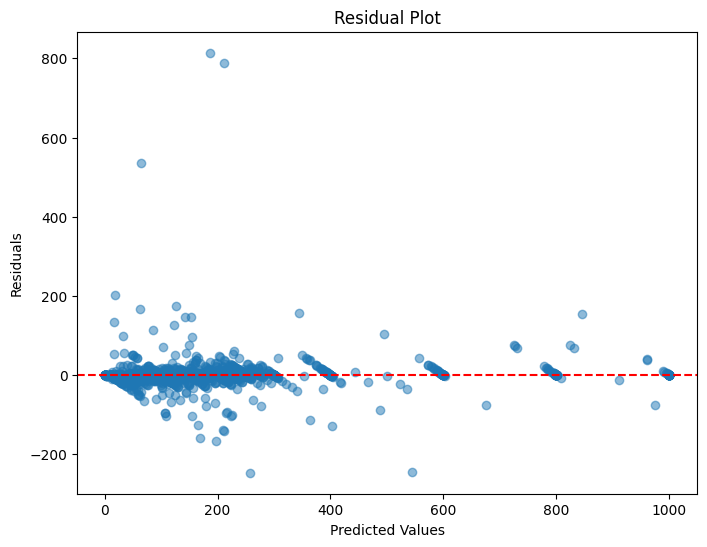

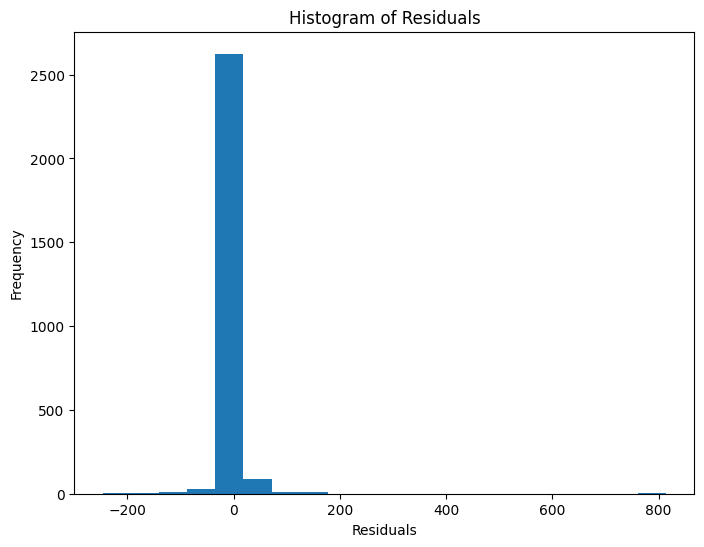

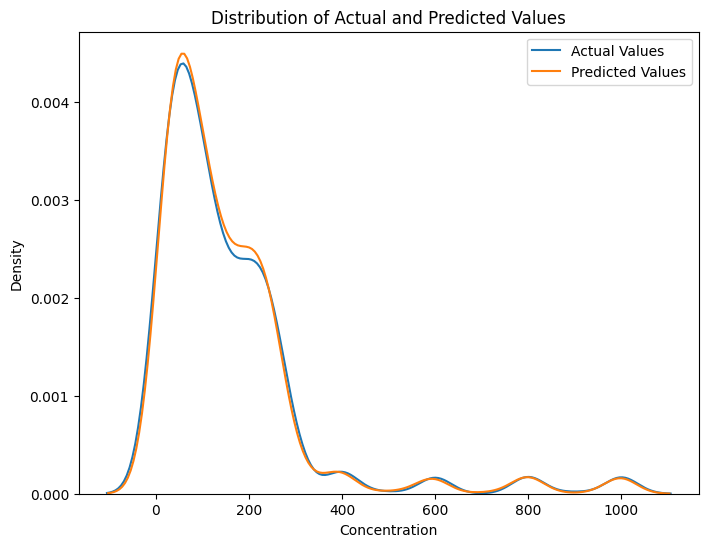

In [25]:
import joblib

# Load the saved model
loaded_model = joblib.load('trained_model.pkl')

# Make predictions on the test set
predictions = loaded_model.predict(X_test)  # Use X_test for prediction

# Evaluate the model's performance (optional)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


# 1. Scatter plot of actual vs. predicted values:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)  # Alpha for transparency
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()

# 2. Residual plot:
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.show()

# 3. Histogram of residuals:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)  # Adjust the number of bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 4. Distribution plot of actual and predicted values:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual Values")
sns.kdeplot(predictions, label="Predicted Values")
plt.xlabel("Concentration")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Values")
plt.legend()
plt.show()



In [26]:
predictions = loaded_model.predict(X_preprocessed[:100])

In [27]:
import joblib

def predict_concentration(new_data):
       """
       Predicts concentration using the trained model.

       Args:
           new_data (pandas.DataFrame or numpy.ndarray): Input data for prediction.

       Returns:
           numpy.ndarray: Predicted concentration values.
       """

       # Load the trained model
       loaded_model = joblib.load('trained_model.pkl')

       # Preprocess new_data if necessary (using the same preprocessor used during training)
       # ...

       # Make predictions
       predictions = loaded_model.predict(new_data)

       return predictions

In [21]:
pip install FastAPI


   ---------------------------------------- 0.0/94.8 kB ? eta -:--:--
   ---------------------------------------- 94.8/94.8 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/73.2 kB ? eta -:--:--
   ---------------------------------------- 73.2/73.2 kB 3.9 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Evaluation Metrics:
R² Score: 0.9695
Mean Absolute Error (MAE): 7.2703
Root Mean Squared Error (RMSE): 30.0179


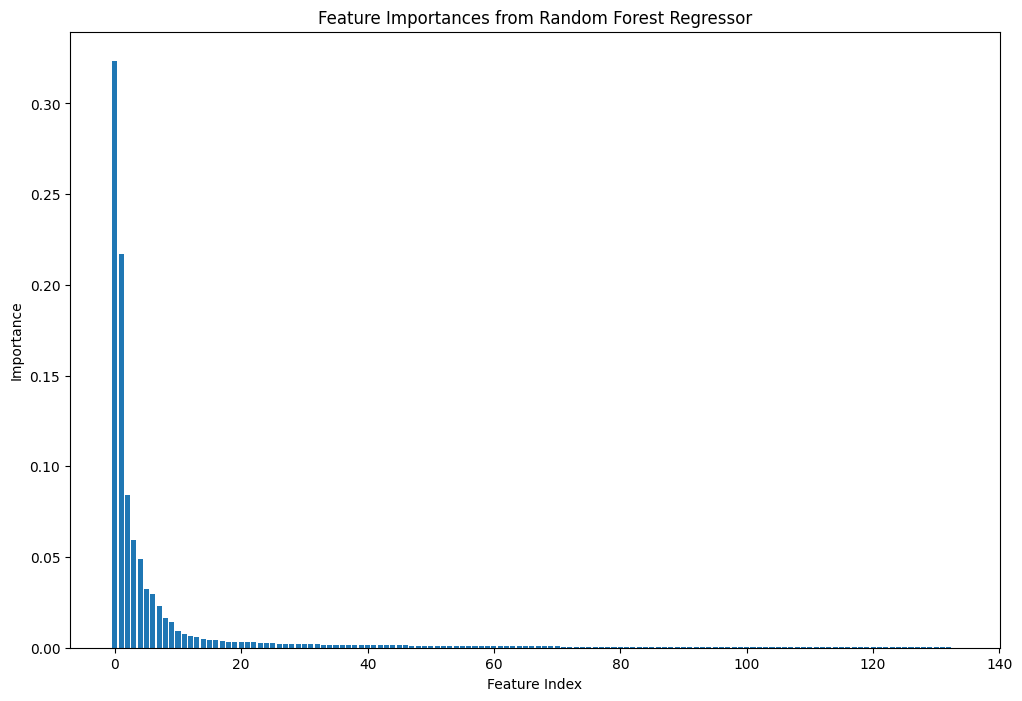

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming `y_test`, `y_pred`, and `model` (Random Forest Regressor) are already defined

# 1. Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 2. Feature Importance Visualization
feature_importances = loaded_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]  # Sorting in descending order
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances from Random Forest Regressor")
plt.show()


In [31]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [29]:
import joblib
joblib.dump(loaded_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [29]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your features and target
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [30]:
# During training (add this to your training code)
import joblib
joblib.dump((best_rf_model, preprocessor), 'trained_model_and_preprocessor.pkl')

['trained_model_and_preprocessor.pkl']

In [37]:
pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [40]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.8 MB 1.5 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 2.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 3.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.8 MB 3.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.8 MB 3.3 MB/s eta 0:00:01
   ----------------------- ---------------- 1.1/1.8 MB 3.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 3.4 MB/s eta 0:00:01
   ------------------------------- -------- 1.5/1.8 MB 3.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 1.8/1.8 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.3 MB/s eta 0:00:00
  Attempting uninst

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [42]:
pip install scikit-learn==1.4.1.post1 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.



  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/10.6 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/10.6 MB 4.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/10.6 MB 4.1 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/10.6 MB 4.2 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.6 MB 4.2 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/10.6 MB 3.3 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.6 MB 3.4 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/10.6 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 7.1/10.6 MB 3.5 MB/s eta 0:00:02
   ----------------------------- ---------- 7.9/10.6 MB 3.6 MB/s eta 0:00:01
   ----------------

In [1]:
# In Jupyter Notebook:
import sklearn
print(sklearn.__version__)  # Should output 1.4.1.post1

1.4.1.post1


In [32]:
# Define batch-month mapping (from your dataset description)
batch_months = {
    1: [1, 2],       # Batch 1: Months 1-2
    2: [3, 4, 8, 9, 10],
    3: [11, 12, 13],
    4: [14, 15],
    5: [16],
    6: [17, 18, 19, 20],
    7: [21],
    8: [22, 23],
    9: [24, 30],
    10: [36]
}

# Reverse mapping: month -> batch
month_to_batch = {}
for batch, months in batch_months.items():
    for month in months:
        month_to_batch[month] = batch

# Assuming your DataFrame has a 'month' column (create it if needed)
# Example: If your data is ordered chronologically, split into batches:
df['month'] = np.arange(1, len(df)+1)  # Replace with actual month data if available
df['batch'] = df['month'].map(month_to_batch)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


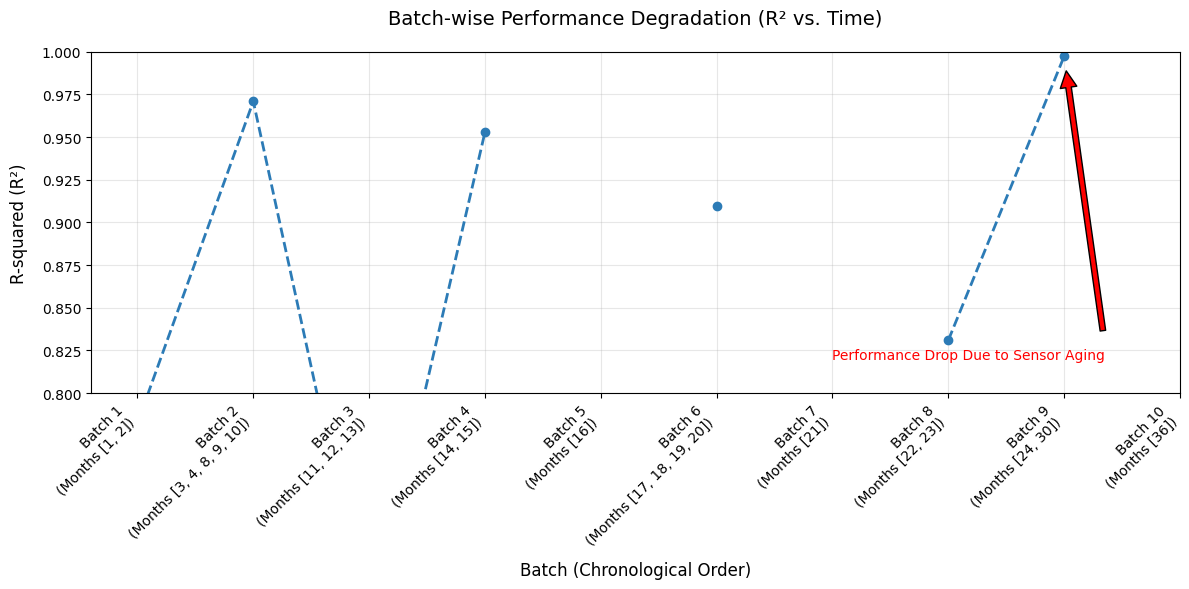

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Assuming:
# - df is your DataFrame with 'batch' column (1-10) and 'concentration' (target)
# - model is your trained RandomForestRegressor
# - preprocessor is your preprocessing pipeline

# Define batch-month mapping (from your dataset description)
batch_months = {
    1: [1, 2],
    2: [3, 4, 8, 9, 10],
    3: [11, 12, 13],
    4: [14, 15],
    5: [16],
    6: [17, 18, 19, 20],
    7: [21],
    8: [22, 23],
    9: [24, 30],
    10: [36]
}

# Calculate midpoint month for each batch (for x-axis)
batch_mid_month = {
    batch: np.mean(months) for batch, months in batch_months.items()
}

# Prepare data
X = df.drop(columns=['concentration'])
y = df['concentration']

# Preprocess data
X_preprocessed = preprocessor.transform(X)

# Predict all data
y_pred = model.predict(X_preprocessed)

# Calculate R² per batch
batch_r2 = {}
for batch in range(1, 11):
    batch_mask = df['batch'] == batch
    r2 = r2_score(y[batch_mask], y_pred[batch_mask])
    batch_r2[batch] = r2

# Sort batches by midpoint month
sorted_batches = sorted(batch_mid_month.items(), key=lambda x: x[1])
x = [batch for batch, mid_month in sorted_batches]
x_labels = [f"Batch {batch}\n(Months {batch_months[batch]})" for batch, mid_month in sorted_batches]
y_r2 = [batch_r2[batch] for batch, mid_month in sorted_batches]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, y_r2, marker='o', linestyle='--', color='#2c7bb6', linewidth=2)
plt.title("Batch-wise Performance Degradation (R² vs. Time)", fontsize=14, pad=20)
plt.xlabel("Batch (Chronological Order)", fontsize=12, labelpad=10)
plt.ylabel("R-squared (R²)", fontsize=12, labelpad=10)
plt.xticks(x, x_labels, rotation=45, ha='right', fontsize=10)
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)

# Annotate performance drop
plt.annotate('Performance Drop Due to Sensor Aging', 
             xy=(9, batch_r2[9]), xytext=(7, 0.82),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

plt.tight_layout()
plt.savefig('batch_performance_degradation.png', dpi=300, bbox_inches='tight')
plt.show()